#### We will be using the dataset of Ukrainian IT specialists' salaries for 2024

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
# Load the data
df = pd.read_csv('Salaries Dec 2024.csv')
df.head()

,Submitted at,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків",Оберіть ваш тайтл або роль у компанії,Categories,Position,Розробники - основна спеціалізація,Основна мова програмування,"Основний напрям роботи компанії, в якій працюєте",Загальний стаж роботи за нинішньою ІТ-спеціальністю,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать
0,2024-11-22 11:03:12,Працюю full-time,800.0,Middle,QA,Manual QA,NaN,TypeScript,Сервісна (аутсорсингова),2.0,Upper-Intermediate,В Україні,Львів чи область,Жінка
1,2024-11-22 11:04:12,Працюю full-time,5000.0,Head,QA,Head of QA,NaN,TypeScript,Продуктова,10.0,Upper-Intermediate,В Україні,Київ чи область,Чоловік
2,2024-11-22 11:21:21,Працюю full-time,4300.0,Lead/Team Lead,QA,Automation QA / AQA,NaN,C# / .NET,Продуктова,10.0,Upper-Intermediate,В Україні,Хмельницький чи область,Чоловік
3,2024-11-22 13:20:11,Працюю full-time,6000.0,Head,QA,Head of QA,NaN,Python,Сервісна (аутсорсингова),15.0,Advanced,"За кордоном, але планую повернутися",NaN,Чоловік
4,2024-11-22 13:47:13,Працюю full-time,2700.0,Middle,SE,Software Engineer / Software Developer,Front-end розробка,TypeScript,Продуктова,4.0,Upper-Intermediate,В Україні,Київ чи область,Чоловік


#### Preliminary data analysis

In [7]:
df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].mean()

3208.7712588351706

In [8]:
df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].median()

2800.0

<Axes: xlabel='Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків', ylabel='Count'>

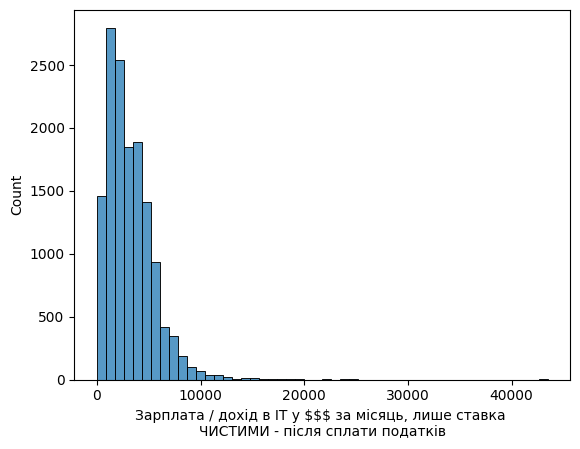

In [4]:
# Plot distribution of the base salary
sns.histplot(df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'], bins=50)

In [5]:
df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].skew()

2.111668174668765

In [6]:
df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].var()

5261661.868261842

{'whiskers': [<matplotlib.lines.Line2D at 0x300291510>,
 'caps': [<matplotlib.lines.Line2D at 0x17f992bd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x30027f010>],
 'medians': [<matplotlib.lines.Line2D at 0x17f991410>],
 'fliers': [<matplotlib.lines.Line2D at 0x3002a9d10>],
 'means': []}

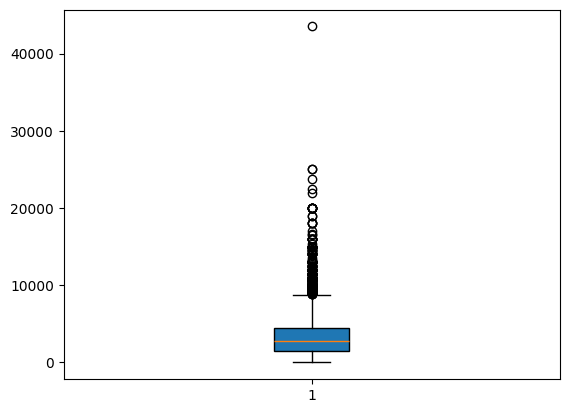

In [7]:
# Boxplot of the base salary vertically
plt.boxplot(df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'], vert=True, patch_artist=True)

In [8]:
# Quartiles
Q1 = df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].quantile(0.25)
Q3 = df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

1500.0 4428.75 2928.75


In [9]:
# Range of the base salary
min_sal = df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].min()
max_sal = df['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].max()
range_sal = max_sal - min_sal
range_sal

43500.0

#### Women's and men's salaries

In [10]:
# Filter the DataFrame for males and females
male_sal = df[df['Ваша стать'] == 'Чоловік']['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків']
female_sal = df[df['Ваша стать'] == 'Жінка']['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків']

# Print counts for male and female salaries
print(male_sal.size)
print(female_sal.size)

10004
4144


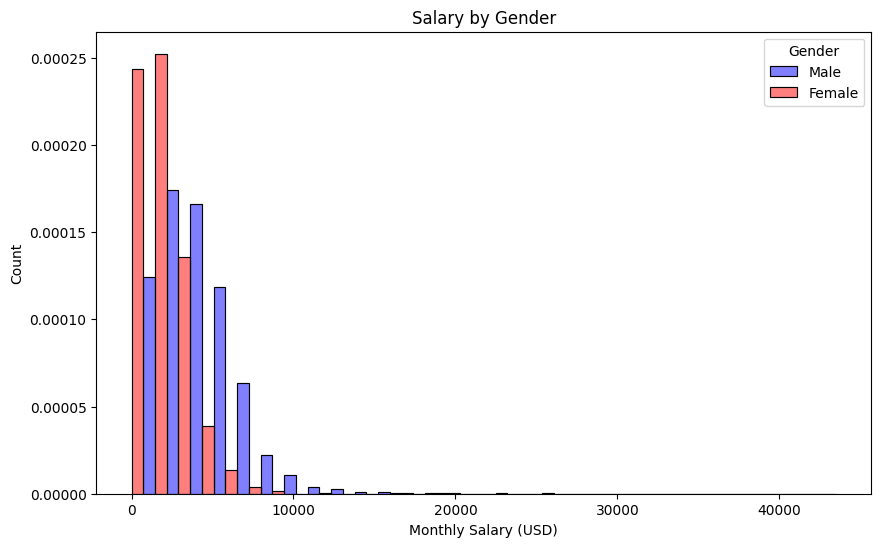

In [16]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків',
    hue='Ваша стать',
    bins=30,
    multiple='dodge',
    palette=['red', 'blue'],
    alpha=0.5,
    stat='density',
    common_norm=False
)

plt.title('Salary by Gender')
plt.xlabel('Monthly Salary (USD)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.show()

In [23]:
# Correlation between gender and salary
df['Gender_Encoded'] = df['Ваша стать'].map({'Чоловік': 1, 'Жінка': 0})
df_clean = df.dropna(subset=['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків', 'Gender_Encoded'])

correlation = df_clean['Gender_Encoded'].corr(df_clean['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'])
print(f"Correlation between gender and salary: {correlation:.2f}")

Correlation between gender and salary: 0.27


#### Mean salary per language (top 10)

In [ ]:
df_languages = df['Основна мова програмування'].dropna()

# Count the number of each language
df_languages.value_counts()

Основна мова програмування
TypeScript                           1508
Python                               1491
JavaScript                           1155
Java                                 1039
C# / .NET                            1038
                                     ... 
Ніякої                                  1
CSS                                     1
SCSS                                    1
DAX, M                                  1
Зараз більше Архітектурної роботи       1
Name: count, Length: 80, dtype: int64

<Axes: xlabel='Основна мова програмування'>

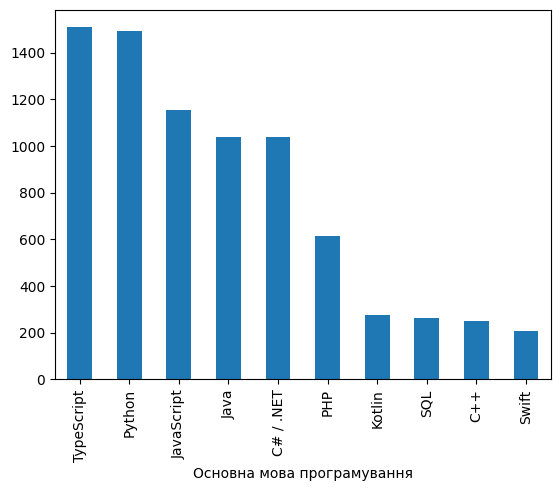

In [ ]:
# Plot top 10 languages
df_languages.value_counts().head(10).plot(kind='bar')

Основна мова програмування
SQL           2882.031856
JavaScript    3027.254926
PHP           3594.716966
C# / .NET     3638.986532
TypeScript    3658.435895
Python        3684.095091
C++           3690.649402
Java          3996.084052
Kotlin        4093.760870
Swift         4162.095756
Name: Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків, dtype: float64


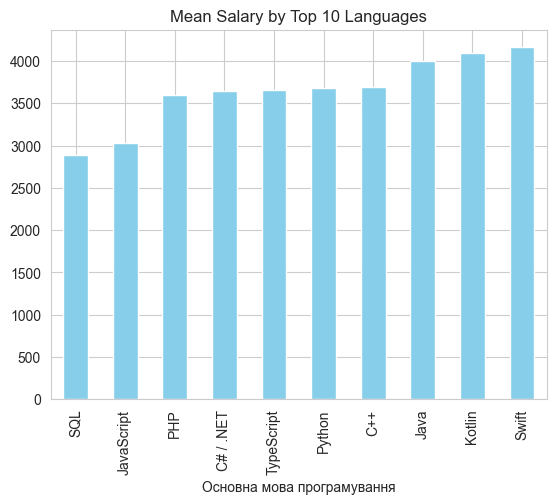

In [30]:
# Mean salary for top 10 languages
top_10_languages = df_languages.value_counts().head(10).index

mean_salaries = df.groupby('Основна мова програмування')['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].mean()
mean_salaries_top_10 = mean_salaries[top_10_languages]
mean_salaries_top_10 = mean_salaries_top_10.sort_values()

mean_salaries_top_10.plot(kind='bar', color='skyblue')
plt.title('Mean Salary by Top 10 Languages')

print(mean_salaries_top_10)

In [26]:
df_clean = df.dropna(subset=[
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю', 
    'Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'
])

# Define X (independent variable) and y (dependent variable)
X = df_clean[['Загальний стаж роботи за нинішньою ІТ-спеціальністю']]  # Use double brackets for DataFrame
y = df_clean['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків']

# Create and fit the linear regression model
lm = linear_model.LinearRegression()
lm.fit(X, y)

# Print the coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficient: {lm.coef_[0]}")

Intercept: 1519.9354000134126
Coefficient: 315.3869166841812


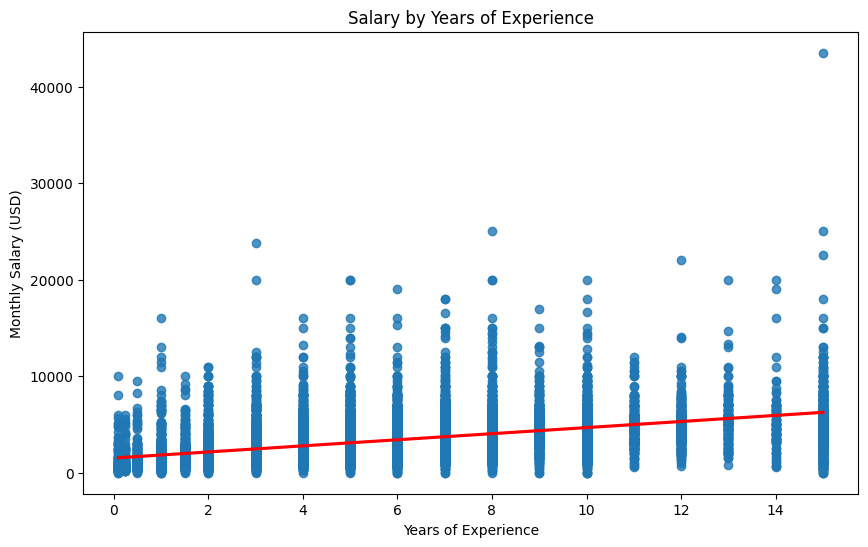

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, line_kws={'color': 'red'})
plt.title('Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Salary (USD)')
plt.show()

In [34]:
df_clean = df_clean[
    (df_clean['Загальний стаж роботи за нинішньою ІТ-спеціальністю'] > 0) & 
    (df_clean['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'] > 0)
]

X = df_clean[['Загальний стаж роботи за нинішньою ІТ-спеціальністю']].values
y_log = np.log(df_clean['Зарплата / дохід в IT у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків'].values)

lm_log = linear_model.LinearRegression()
lm_log.fit(X, y_log)

print(f"Intercept: {lm_log.intercept_}")
print(f"Coefficient: {lm_log.coef_[0]}")

Intercept: 7.202431051894374
Coefficient: 0.1152551593867374


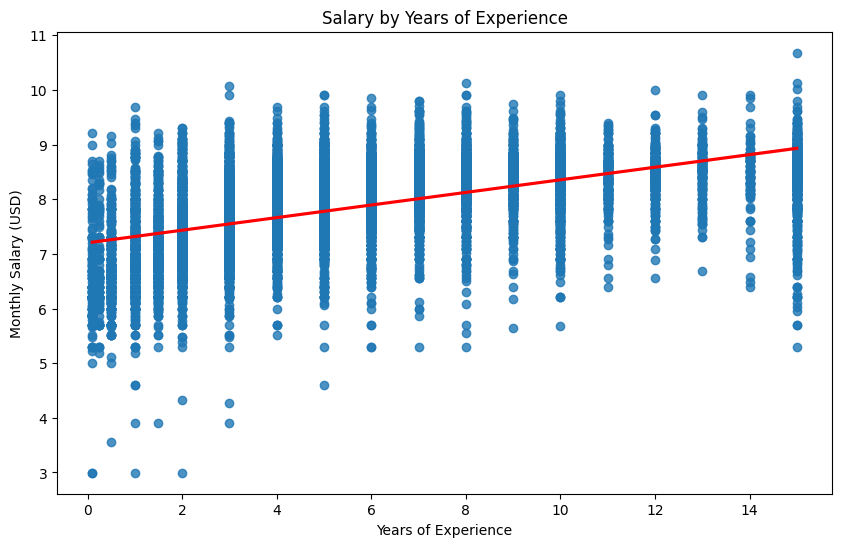

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y_log, line_kws={'color': 'red'})
plt.title('Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Salary (USD)')
plt.show()